In [1]:
# chargement des modules requis
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from ipywidgets import interact, interactive, fixed, interact_manual
import colorsys

import skimage.color as skc
import ipywidgets as ipw

import scipy.stats as sst

# un générateur de nombres aléatoires
rng=np.random.default_rng()

# affichage des images en niveaux de gris
mpl.rc('image', cmap='gray')

# fonction de chargement d'une image et transformation en niveaux de gris
def lireImage(fname):
    ima=mpi.imread(fname) # lecture du fichier image
    if len(ima.shape)==3: # dans le cas d'une image couleur
        ima=colorsys.rgb_to_yiq(*tuple(np.transpose(ima,(2,0,1))))[0] # transformation en niveaux de gris (composante y dans la représentation yiq)
    ima = ima/255 # expression des valeurs entre 0 et 1
    return ima

In [2]:
# valeur moyenne d'un dé
N=1000
print(np.mean(np.random.randint(1,7,size=N)))

3.539


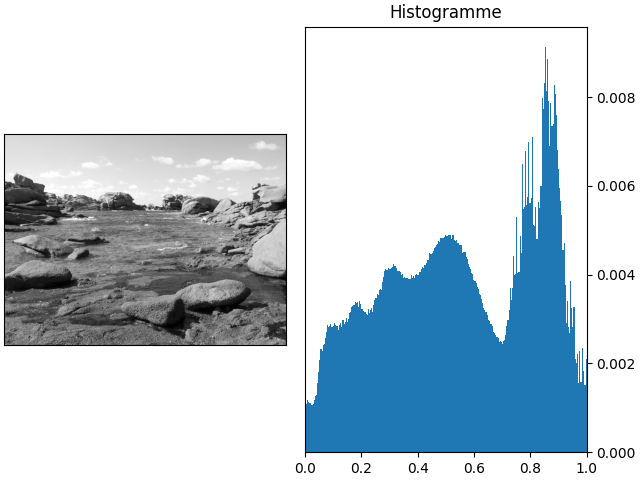

In [3]:
# Histogramme d'une image
ima=lireImage('accueil.jpg')

plt.close('all')

output=ipw.Output()
with output:
    # on ajoute un deuxième graphique pour afficher l'histogramme -> hax
    fig1, (iax, hax) = plt.subplots(1,2,constrained_layout=True)
iax.get_xaxis().set_visible(False)
iax.get_yaxis().set_visible(False)
idisp=iax.imshow(ima,vmin=0,vmax=1)

sima=ima.copy()

# affichage de l'histogramme
# préparation du graphique
hax.set_title('Histogramme')
hax.yaxis.set_label_position("right")
hax.yaxis.tick_right()
hax.set_xlim([0,1]) # évite de ne se concentrer que sur la plage de probas non nulles
# calcul de l'histogramme
nbbins=256
freq,edges=np.histogram(ima.ravel(),bins=nbbins,range=(0,1))
freq = freq/np.prod(ima.shape) # on normalise pour que la somme fasse 1 -> probabilité d'occurrence
# affichage de l'histogramme : hb=objet graphique qui sera mis à jour
hb=hax.bar(edges[:-1], freq, width=np.diff(edges),align="edge")

## EXERCICE: affichage de la moyenne et de l'écart-type
imoy=np.mean(ima.ravel()) # moyenne de l'image
ietype=np.std(ima.ravel()) # écart-type de l'image
max_freq=np.max(freq) # valeur maximale sur l'axe vertical de l'histogramme
#lmoy,=hax.plot([imoy, imoy],[0,max_freq],'k-') # line verticale pour la moyenne (k=couleur noire)
#letype,=hax.plot([imoy-ietype,imoy+ietype],[max_freq/2, max_freq/2],'k-',linewidth=5) # ligne horizontale épaisse pour l'écart-type
## FIN EXERCICE

# liste de couleurs pour afficher une couleur différente à chaque fois que l'histogramme est mis à jour
colors=['red','green','blue','orange']
icol=0
# mise à jour de l'histogramme
def update_hist():
    global icol
    # calcul de l'histogramme
    im=idisp.get_array()
    freq,edges=np.histogram(im.ravel(),bins=nbbins,range=(0,1))
    freq = freq/np.prod(im.shape)
    # on change la couleur
    col=colors[icol%len(colors)]
    icol=icol+1
    # mise à jour de l'objet graphique
    for r,f,s,e in zip(hb.patches,freq,edges[:-1],edges[1:]):
        r.set_height(f)
        r.set_x(s)
        r.set_width(e-s)
        r.set_edgecolor(col)

def update_image(im):
    idisp.set_data(im)
    update_hist() # NOUVEAU CODE: ajout de la mise à jour de l'histogramme chaque fois que l'image change
    
buttonR = ipw.Button(description='Reset',tooltip="Réinitialisation de l'image")
buttonR.on_click(lambda x: update_image(ima)) 

# un bouton mélange pour montrer que l'histogramme ne change pas si on mélange les pixels
# implication : pas de prise en compte de l'information spatiale dans ce descripteur
def shuffle_image(b):
    rng.shuffle(sima.ravel())
    update_image(sima)
    
buttonS = ipw.Button(description='Mélange',tooltip='Mélange les pixels')
buttonS.on_click(shuffle_image) 

controls=ipw.HBox([buttonR, buttonS])
ipw.VBox([controls, output])

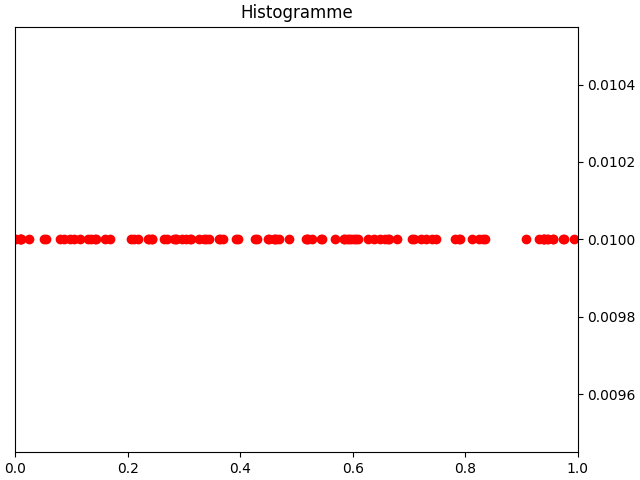

In [4]:
# illustration d'un histogramme d'une va continue
plt.close('all')

output=ipw.Output()
with output:
    fig, ax = plt.subplots(1,1,constrained_layout=True)

ax.set_title('Histogramme')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlim([0,1]) # évite de ne se concentrer que sur la plage de probas non nulles

n=100
x=np.sort(np.random.rand(n))
hplt, = ax.plot(x,np.ones(n)/n,'ro')

# mise à jour de l'histogramme
def update_hist(n):
    # calcul de l'histogramme
    x=np.sort(np.random.rand(n))
    ax.clear()
    ax.plot(x,np.ones(n)/n,'ro')
    #hplt.set_xdata(x)
    #hplt.set_ydata(np.ones(n))
    
def on_change_n(change):
    update_hist(change['new']) 

nvalue = ipw.BoundedIntText(
            value=n,
            min=0,
            max=1000000000,
            step=1,
            description='#samples:',
            disabled=False,
            continuous_update=True
        )
nvalue.observe(on_change_n,names='value')
ipw.VBox([nvalue, output])

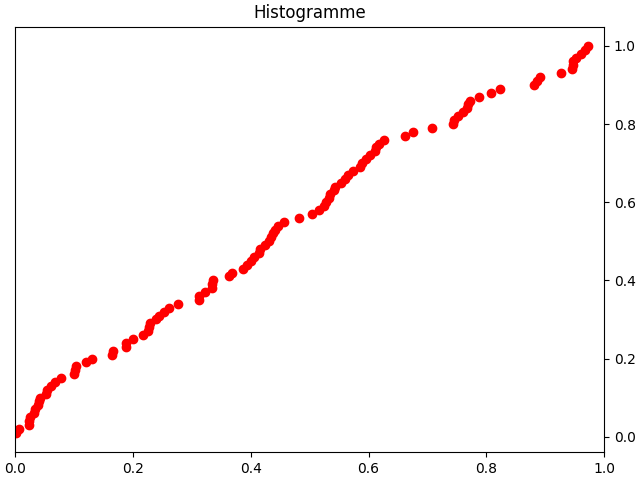

In [5]:
# fonction de répartition d'une va continue
plt.close('all')

output=ipw.Output()
with output:
    fig, ax = plt.subplots(1,1,constrained_layout=True)

ax.set_title('Histogramme')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlim([0,1]) # évite de ne se concentrer que sur la plage de probas non nulles

n=100
x=np.sort(np.random.rand(n))
hplt, = ax.plot(x,[i/n for i in range(1,n+1)],'ro')

# mise à jour de l'histogramme
def update_hist(n):
    # calcul de l'histogramme
    x=np.sort(np.random.rand(n))
    ax.clear()
    ax.plot(x,[i/n for i in range(1,n+1)],'ro')
    #hplt.set_xdata(x)
    #hplt.set_ydata(np.ones(n))
    
def on_change_n(change):
    update_hist(change['new']) 

nvalue = ipw.BoundedIntText(
            value=n,
            min=0,
            max=1000000000,
            step=1,
            description='#samples:',
            disabled=False,
            continuous_update=True
        )
nvalue.observe(on_change_n,names='value')
ipw.VBox([nvalue, output])

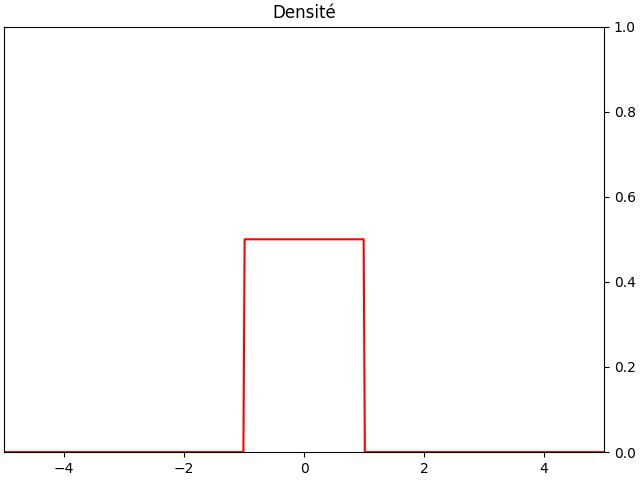

In [7]:
# pdf d'une loi UNIFORME (animation)
plt.close('all')

output=ipw.Output()
with output:
    fig, ax = plt.subplots(1,1,constrained_layout=True)

ax.set_title('Densité')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
xmin,xmax=-5,5
ax.set_xlim([xmin,xmax]) # évite de ne se concentrer que sur la plage de probas non nulles
ax.set_ylim([0,1])

x=np.linspace(xmin,xmax,500,True)

a,b=-1,1
l=1
m,s=0,1

def uniform(x,a,b):
    y=np.zeros(len(x))
    y[np.logical_and(x>=a,x<b)]=1/(b-a)
    return y
    
def exponential(x,l):
    y=l*np.exp(-l*x)
    return y

def gaussian(x,m,s):
    cx=x-m
    y=np.exp(-(cx*cx)/(2*s*s))/(s*np.sqrt(2*np.pi))
    return y     

graph,=ax.plot(x,uniform(x,a,b),'r-')

# mise à jour du graphe
def update_graph():
    global a,b,graph
    graph.set_ydata(uniform(x,a,b))
    
def on_change_a(change):
    global a,b
    a=change['new']
    if a > b:
        bSlider.value=a+0.1
    update_graph()

def on_change_b(change):
    global a,b
    b=change['new']
    if b < a:
        aSlider.value=b-0.1
    update_graph()

aSlider=ipw.FloatSlider(min=xmin,max=xmax-0.1,step=0.1,value=a,description='a',continuous_update=True)
bSlider=ipw.FloatSlider(min=xmin+0.1,max=xmax,step=0.1,value=b,description='b',continuous_update=True)
aSlider.observe(on_change_a,names='value')
bSlider.observe(on_change_b,names='value')

sliders=ipw.VBox([aSlider,bSlider])
ipw.VBox([sliders, output])

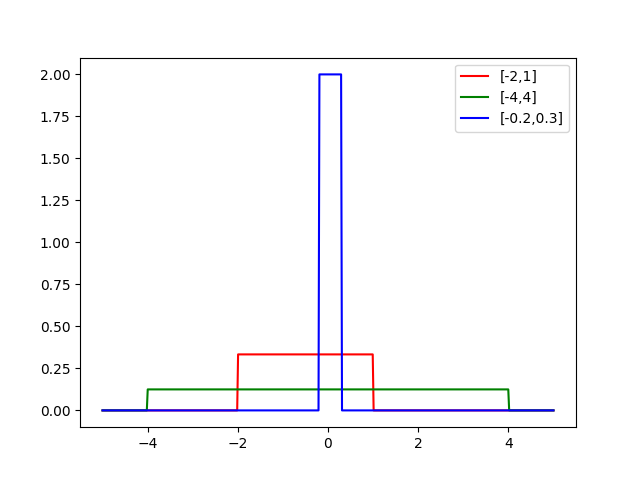

In [8]:
# pdf d'une loi UNIFORME
plt.close('all')

fig,ax=plt.subplots()

x=np.linspace(xmin,xmax,500,True)

def uniform(x,a,b):
    y=np.zeros(len(x))
    y[np.logical_and(x>=a,x<b)]=1/(b-a)
    return y

l1,l2,l3=ax.plot(x,uniform(x,-2,1),'r-',
                  x,uniform(x,-4,4),'g-',
                  x,uniform(x,-0.2,0.3),'b-')
ax.legend((l1,l2,l3),('[-2,1]','[-4,4]','[-0.2,0.3]'),loc='upper right')

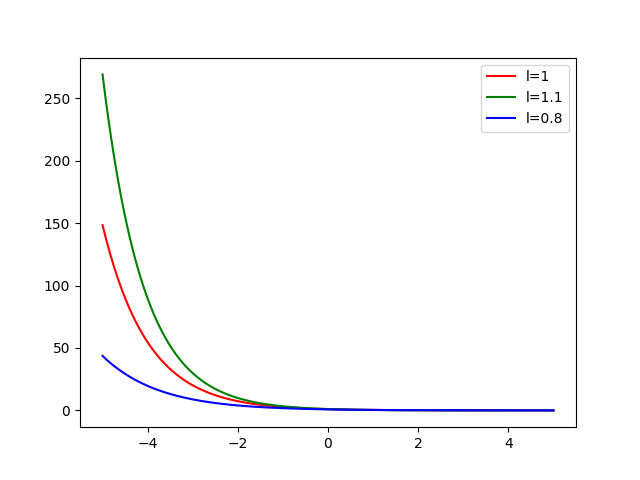

In [9]:
# pdf l'une loi EXPONENTIELLE
plt.close('all')

fig,ax=plt.subplots()

x=np.linspace(xmin,xmax,500,True)
    
def exponential(x,l):
    y=l*np.exp(-l*x)
    return y

l1,l2,l3=ax.plot(x,exponential(x,1),'r-',
                  x,exponential(x,1.1),'g-',
                  x,exponential(x,0.8),'b-')
ax.legend((l1,l2,l3),('l=1','l=1.1','l=0.8'),loc='upper right')

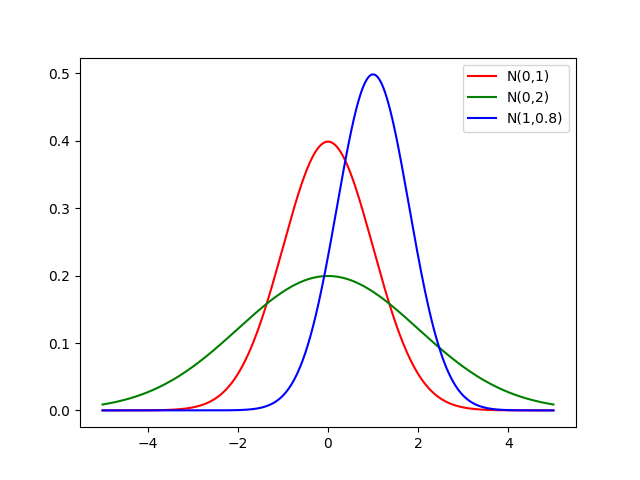

In [10]:
# pdf d'une loi GAUSSIENNE
plt.close('all')

fig,ax=plt.subplots()

x=np.linspace(xmin,xmax,500,True)

m,s=0,1

def gaussian(x,m,s):
    cx=x-m
    y=np.exp(-(cx*cx)/(2*s*s))/(s*np.sqrt(2*np.pi))
    return y     

l1,l2,l3=ax.plot(x,gaussian(x,0,1),'r-',
                  x,gaussian(x,0,2),'g-',
                  x,gaussian(x,1,0.8),'b-')
ax.legend((l1,l2,l3),('N(0,1)','N(0,2)','N(1,0.8)'),loc='upper right')

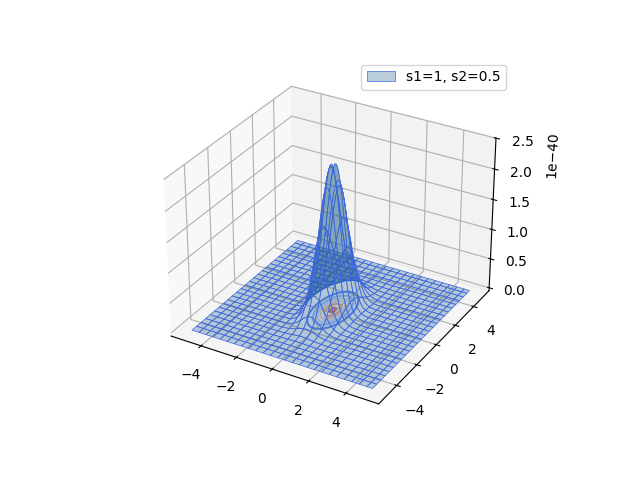

In [11]:
# pdf d'une loi gaussienne 2D
plt.close('all')
ax=plt.figure().add_subplot(projection='3d')
s1=1
s2=0.5
S=np.array([[s1*s1,0],[0,s2*s2]])
xmin,ymin,xmax,ymax=-5,-5,5,5
npts=100
x,y=np.meshgrid(np.linspace(xmin,xmax,npts),np.linspace(ymin,ymax,npts))
def gaussian(x,y,S):
    invS=np.linalg.inv(S)
    detS=np.linalg.det(S)
    n=len(x)
    fact=np.pow(2*np.pi,n/2)*np.sqrt(detS)
    P=np.stack((x,y),axis=0)
    val=0.5*((P.T@invS)*P.T).sum(axis=2)
    return np.exp(-val)/fact

z=gaussian(x,y,S)
surf=ax.plot_surface(x,y,z,edgecolor='royalblue', lw=0.5, rstride=4, cstride=4,
                alpha=0.3)
ax.contour(x, y, z, zdir='z', offset=0, cmap='coolwarm')
ax.legend((surf,), (f's1={s1}, s2={s2}',))

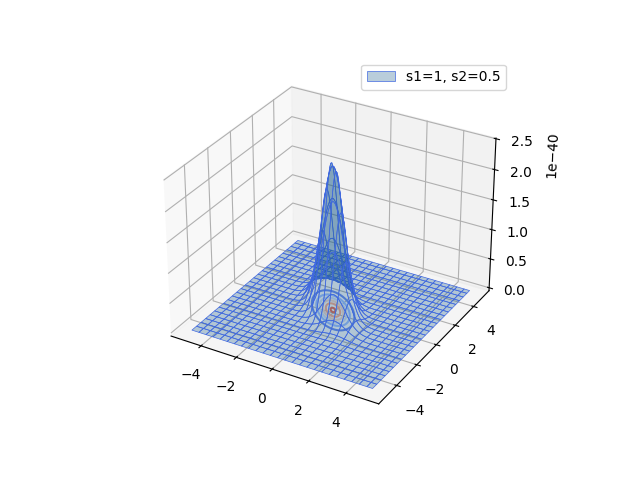

In [16]:
plt.close('all')
ax=plt.figure().add_subplot(projection='3d')
# écart-types
s1=1
s2=0.5
S=np.array([[s1*s1,0],[0,s2*s2]])

# rotation
angle=np.pi/4
ca,sa=np.cos(angle),np.sin(angle)
R=np.array([[ca,-sa],[sa,ca]])

# matrice de covariance
S=R.T@S@R

xmin,ymin,xmax,ymax=-5,-5,5,5
npts=100
x,y=np.meshgrid(np.linspace(xmin,xmax,npts),np.linspace(ymin,ymax,npts))
def gaussian(x,y,S):
    invS=np.linalg.inv(S)
    detS=np.linalg.det(S)
    n=len(x)
    fact=np.pow(2*np.pi,n/2)*np.sqrt(detS)
    P=np.stack((x,y),axis=0)
    val=0.5*((P.T@invS)*P.T).sum(axis=2)
    return np.exp(-val)/fact

z=gaussian(x,y,S)
surf=ax.plot_surface(x,y,z,edgecolor='royalblue', lw=0.5, rstride=4, cstride=4,
                alpha=0.3)
ax.contour(x, y, z, zdir='z', offset=0, cmap='coolwarm')
ax.legend((surf,), (f's1={s1}, s2={s2}',))

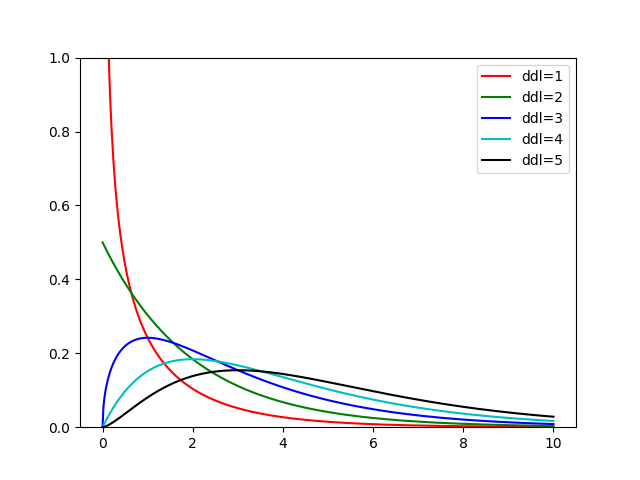

In [17]:
# pdf d'une loi du chi2
plt.close('all')
fig,ax=plt.subplots()
ax.set_ylim(0,1)
x=np.linspace(0,10,500)

c1,=ax.plot(x,sst.chi2.pdf(x,1),'r-')
c2,=ax.plot(x,sst.chi2.pdf(x,2),'g-')
c3,=ax.plot(x,sst.chi2.pdf(x,3),'b-')
c4,=ax.plot(x,sst.chi2.pdf(x,4),'c-')
c5,=ax.plot(x,sst.chi2.pdf(x,5),'k-')
ax.legend((c1,c2,c3,c4,c5),('ddl=1','ddl=2','ddl=3','ddl=4','ddl=5'))

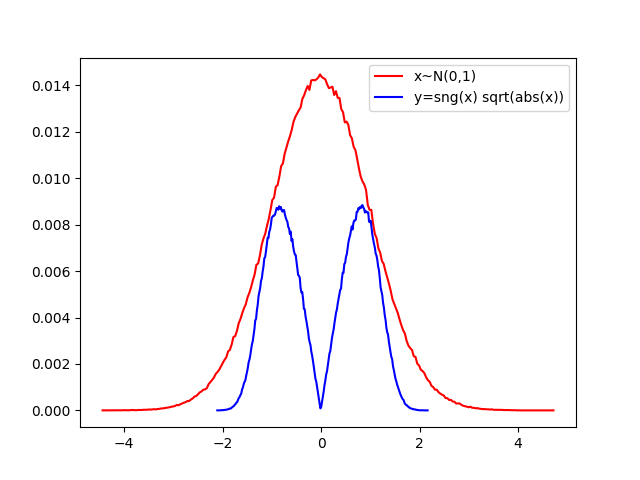

In [18]:
# exemple de loi transformée avec pdf très différente
plt.close('all')
fig,ax=plt.subplots()
N=1000000
nbbins=256
x=np.random.normal(size=N)
fx,ex=np.histogram(x,bins=nbbins)
fx=fx/N
#hx=plt.bar(ex[:-1], fx, width=np.diff(ex),align="edge")
gx,=ax.plot(ex[:-1],fx,'r-')
y=x/np.abs(x)*np.sqrt(np.abs(x))
fy,ey=np.histogram(y,bins=nbbins)
fy=fy/N
#hy=plt.bar(ey[:-1], fy, width=np.diff(ey),align="edge")
gy,=ax.plot(ey[:-1],fy,'b-')
ax.legend((gx,gy),('x~N(0,1)','y=sng(x) sqrt(abs(x))'))

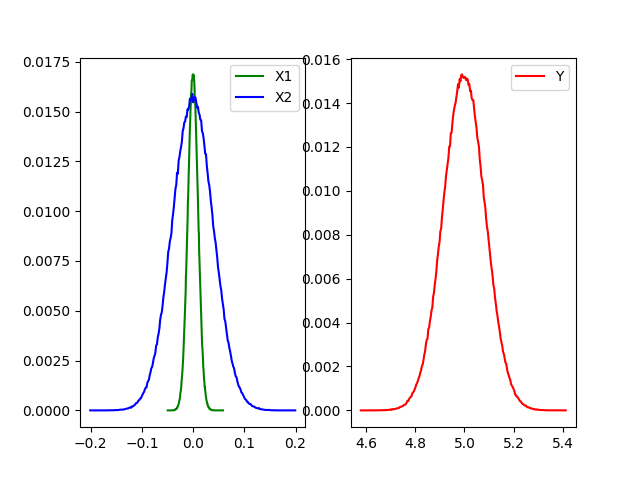

In [20]:
# pdf de l'exemple du cours f(x1,x2)=x1^2+3x1-2x2+5, (x1,x2)~N(0,diag(1,0.5^2))
plt.close('all')
fig,(ax,ay)=plt.subplots(1,2)
N=1000000
nbbins=256
sigma=0.1
x1=np.random.normal(loc=0,scale=sigma*sigma,size=N)
x2=np.random.normal(loc=0,scale=sigma*sigma*4,size=N)
y=x1*x1+3*x1-2*x2+5

fx1,ex1=np.histogram(x1,bins=nbbins)
fx1=fx1/N
#hx=plt.bar(ex[:-1], fx, width=np.diff(ex),align="edge")
gx1,=ax.plot(ex1[:-1],fx1,'g-')
fx2,ex2=np.histogram(x2,bins=nbbins)
fx2=fx2/N
#hx=plt.bar(ex[:-1], fx, width=np.diff(ex),align="edge")
gx2,=ax.plot(ex2[:-1],fx2,'b-')
ax.legend((gx1,gx2),('X1','X2'))

fy,ey=np.histogram(y,bins=nbbins)
fy=fy/N
#hx=plt.bar(ex[:-1], fx, width=np.diff(ex),align="edge")
gy,=ay.plot(ey[:-1],fy,'r-')
ay.legend((gy,),('Y',))


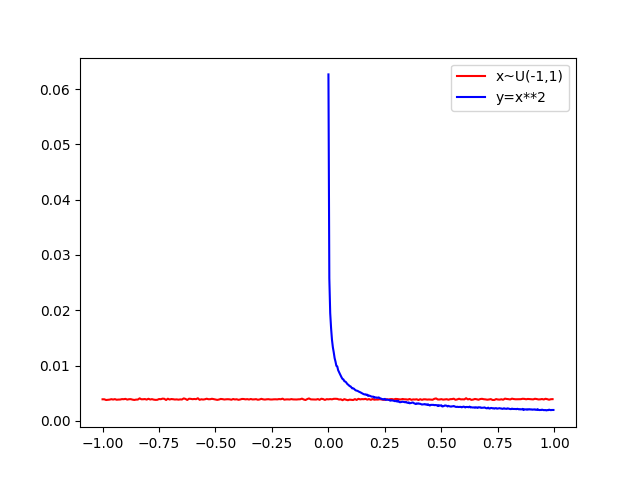

In [21]:
# autre exemple de loi transformée f(x)=x^2, x~U(-1,1)
plt.close('all')
fig,ax=plt.subplots()
N=1000000
nbbins=256
# tirage aléatoire entre -1 et 1
x=2*np.random.rand(N)-1
fx,ex=np.histogram(x,bins=nbbins)
fx=fx/N
gx,=ax.plot(ex[:-1],fx,'r-')

# fonction de transformation f(x)=x^2
y=x*x
fy,ey=np.histogram(y,bins=nbbins)
fy=fy/N
gy,=ax.plot(ey[:-1],fy,'b-')
ax.legend((gx,gy),('x~U(-1,1)','y=x**2'))

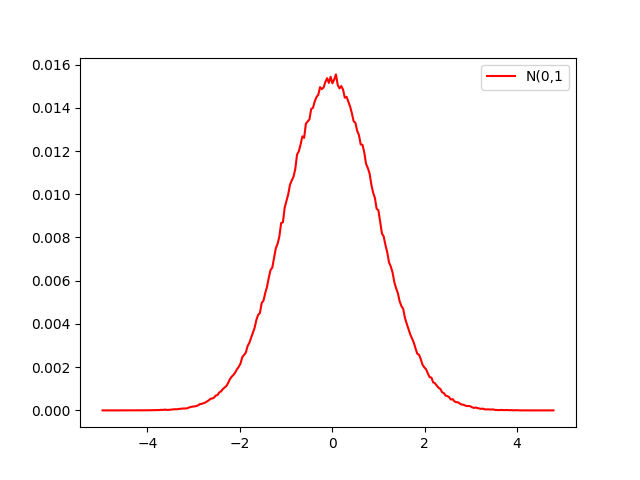

In [22]:
# Box Muller
plt.close('all')
nbbins=256
N=1000000
fig,ax=plt.subplots()

u1=np.random.rand(N//2)
u2=np.random.rand(N//2)
R=np.sqrt(-2*np.log(u1))
t=2*np.pi*u2
z1=R * np.cos(t)
z2=R * np.sin(t)
z=np.hstack((z1,z2)) # utilisation de z1 et z2 pour les échantillons de la loi finale

fz,ez=np.histogram(z,bins=nbbins)
fz=fz/N
gz,=ax.plot(ez[:-1],fz,'r-')
ax.legend((gz,),('N(0,1',))